# Codecademy [NBA Trends Project](https://www.codecademy.com/projects/practice/nba-trends)

*Analyze National Basketball Association (NBA) data to look at associations between teams, win-rates, playoff appearances, and more.*

In this project, you'll analyze data from the NBA (National Basketball Association) and explore possible associations. 

This data was originally sourced from 538's Analysis of the [Complete History Of The NBA](http://fivethirtyeight.com/interactives/the-complete-history-of-every-nba-team-by-elo) and contains the original, unmodified data from [Basketball Reference](http://www.basketball-reference.com/) as well as several additional variables 538 added to perform their own analysis. 

You can read more about the data and how it's being used by 538 [here](https://github.com/fivethirtyeight/data/tree/master/nba-elo). For this project we've limited the data to just 5 teams and 10 columns (plus one constructed column, `point_diff`, the difference between `pts` and `opp_pts`).

You will create several charts and tables in this project, so you'll need to use `plt.clf()` between plots in your code so that the plots don't layer on top of one another.


In [664]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [665]:
#to make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

In [666]:
nba = pd.read_csv('nba_games.csv')
nba.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24359 entries, 0 to 24358
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        24359 non-null  object 
 1   year_id        24359 non-null  int64  
 2   fran_id        24359 non-null  object 
 3   opp_fran       24359 non-null  object 
 4   game_location  24359 non-null  object 
 5   is_playoffs    24359 non-null  int64  
 6   pts            24359 non-null  int64  
 7   opp_pts        24359 non-null  int64  
 8   game_result    24359 non-null  object 
 9   forecast       24359 non-null  float64
 10  point_diff     24359 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 2.0+ MB


In [667]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

### Task 1
The data has been subset for you into two smaller datasets: games from 2010 (named nba_2010) and games from 2014 (named nba_2014). To start, let’s focus on the 2010 data.

Suppose you want to compare the knicks to the nets with respect to points earned per game. Using the pts column from the nba_2010 DataFrame, create two series named knicks_pts (fran_id = "Knicks") and nets_pts(fran_id = "Nets") that represent the points each team has scored in their games.


In [669]:
# Getting the 'pts' column from the dataset.
nets_pts_per_game_2010 = nba_2010[nba_2010.fran_id=='Nets']['pts']
knicks_pts_per_game_2010 = nba_2010[nba_2010.fran_id=='Knicks']['pts']

### Task 2

Calculate the difference between the two teams’ average points scored and save the result as diff_means_2010. Based on this value, do you think fran_id and pts are associated? Why or why not?


The difference in means netween the nets and knicks is 9.73


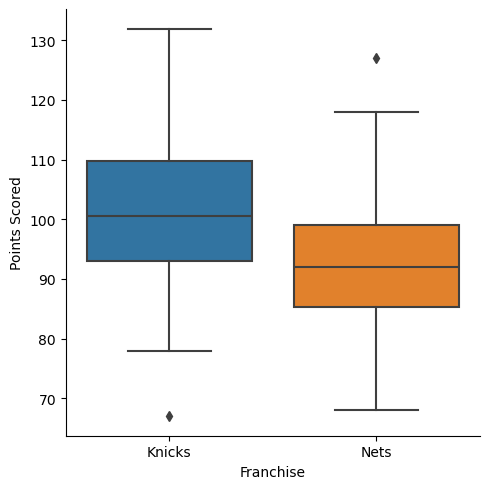

In [671]:
# Getting the average pts
nets_avg_pts = np.around(np.mean(nets_pts_per_game_2010),2)
knicks_avg_pts = np.around(np.mean(knicks_pts_per_game_2010),2)
diff_means_2010 = np.around(np.absolute(nets_avg_pts - knicks_avg_pts),2)
print(f'The difference in means netween the nets and knicks is {diff_means_2010}')

# Checking for association by way of box plot
nba_2010_nets_knicks = nba_2010[(nba_2010['fran_id']=='Nets') | (nba_2010['fran_id']=='Knicks')]

#Creating a basic box plot.
ax = sns.catplot(x='fran_id',y='pts',data=nba_2010_nets_knicks,kind='box')
plt.xlabel("Franchise")
plt.ylabel("Points Scored")
plt.show()

*Overlap in the side by side box plot suggest less association between the variables being compared. 
It seems that the lower quartile of the knicks and the upper quartile of the Nets seem to overlap*

### Task 3
Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful. Create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets. Use the series you created in the previous step (1) and the code below to create the plot. Do the distributions appear to be the same?


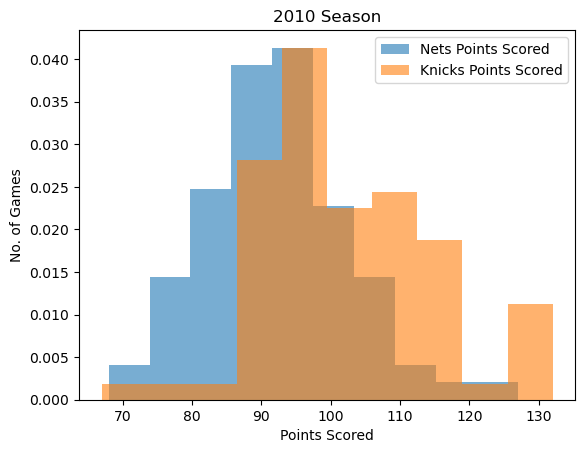

In [674]:
plt.clf()
plt.hist(nets_pts_per_game_2010,density=True,alpha=0.6,label='Nets Points Scored')
plt.hist(knicks_pts_per_game_2010,density=True,alpha=0.6,label='Knicks Points Scored')
plt.ylabel("No. of Games")
plt.xlabel("Points Scored")
plt.legend(loc='upper right')
plt.title('2010 Season')
plt.show()

### Task 4
Now, let’s compare the 2010 games to 2014. Replicate the steps from Tasks 2 and 3 using `nba_2014`. First, calculate the mean difference between the two teams points scored. Save and print the value as `diff_means_2014`. Did the difference in points get larger or smaller in 2014? Then, plot the overlapping histograms. Does the mean difference you calculated make sense?


The difference in means netween the nets and knicks is 0.45


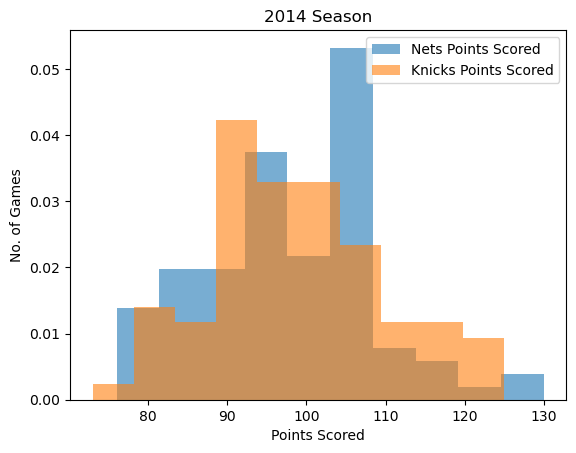

In [676]:
# Getting the 'pts' column from the dataset (year 2014).
nets_pts_per_game_2014 = nba_2014[nba_2014.fran_id=='Nets']['pts']
knicks_pts_per_game_2014 = nba_2014[nba_2014.fran_id=='Knicks']['pts']

# Getting the average pts
nets_avg_pts = np.around(np.mean(nets_pts_per_game_2014),2)
knicks_avg_pts = np.around(np.mean(knicks_pts_per_game_2014),2)
diff_means_2014 = np.around(np.absolute(nets_avg_pts - knicks_avg_pts),2)
print(f'The difference in means netween the nets and knicks is {diff_means_2014}')

# Plotting the histogram

plt.clf()
plt.hist(nets_pts_per_game_2014,density=True,alpha=0.6,label='Nets Points Scored')
plt.hist(knicks_pts_per_game_2014,density=True,alpha=0.6,label='Knicks Points Scored')
plt.ylabel("No. of Games")
plt.xlabel("Points Scored")
plt.legend(loc='upper right')
plt.title('2014 Season')
plt.show()

### Task 5
For the remainder of this project, we’ll focus on data from 2010. Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game.

Using nba_2010, generate side-by-side boxplots with points scored (pts) on the y-axis and team (fran_id) on the x-axis. Is there any overlap between the boxes? Does this chart suggest that fran_id and pts are associated? Which pairs of teams, if any, earn different average scores per game?


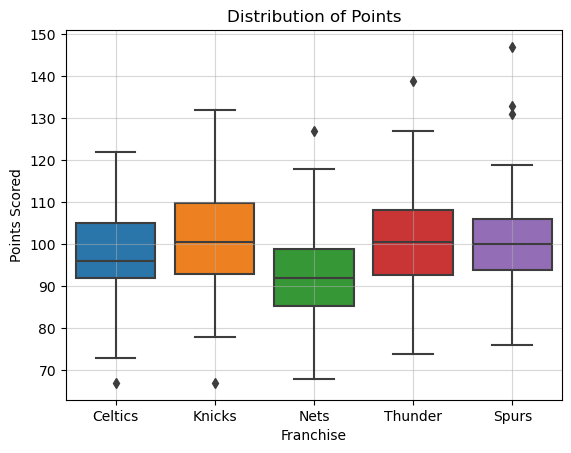

Percentile Statistics for 25th, 50th and 75th percentile:         <lambda_0>  <lambda_1>  <lambda_2>
fran_id                                    
Celtics     68.5750      70.150     71.7250
Knicks      69.2275      71.455     73.6825
Nets        68.8100      69.620     70.4300
Spurs       77.1375      78.275     79.4125
Thunder     75.0875      76.175     77.2625


In [678]:
box_plot_data = nba_2010[['fran_id','pts']]
sns.boxplot(data=box_plot_data, x="fran_id", y="pts",saturation=0.85,dodge='auto',width=0.8)
plt.xlabel('Franchise')
plt.ylabel('Points Scored')
plt.title('Distribution of Points')
plt.grid(alpha=0.5)
plt.show()
#Getting the percentile Statistics
grouped = nba_2010.groupby('fran_id')['pts'].agg({lambda x: np.percentile(x,0.25), lambda x: np.percentile(x,0.5), lambda x: np.percentile(x,0.75)})
print(f"Percentile Statistics for 25th, 50th and 75th percentile:{grouped}")

### Task 6
We'd like to know if teams tend to win more games at home compared to away.

The variable, `game_result`, indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). The variable, `game_location`, indicates whether a team was playing at home or away ('H' stands for “home” and 'A' stands for “away”). 

Data scientists will often calculate a contingency table of frequencies to help them determine if categorical variables are associated. Calculate a table of frequencies that shows the counts of game_result and game_location.

Save your result as `location_result_freq` and print your result. Based on this table, do you think the variables are associated?`


In [680]:
# Comparing if teams win more games at home or away.
#using the 2010 data
counts_game_result = nba_2010['game_result']
counts_game_location =  nba_2010['game_location']

#using crosstab to calculate a contingency table.
location_result_freq = pd.crosstab(counts_game_result,counts_game_location)
location_result_freq

game_location,A,H
game_result,,
L,133,105
W,92,120


*Based on this table alone it is not sufficiently proven that we can reject our null hypothesis of association between the two variables.*

### Task 7

Convert this table of frequencies to a table of proportions and save the result as `location_result_proportions`.

In [683]:
location_result_proportions = location_result_freq/len(nba_2010)
location_result_proportions

game_location,A,H
game_result,,
L,0.295556,0.233333
W,0.204444,0.266667


### Task 8
Using the contingency table created above (Task 6), calculate the expected contingency table (if there were no association) and the Chi-Square statistic.

Does the actual contingency table look similar to the expected table — or different? Based on this output, do you think there is an association between these variables?


In [685]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(chi2)
print(expected)

6.501704455367053
[[119. 119.]
 [106. 106.]]


*For a 2x2 table, Chi-squared greater than about 4 indicates an association. It seems teh value is greater than 4 indicating an association. However, the expected and observed values are quite different.*

### Task 9

For each game, 538 has calculated the probability that each team will win the game. We want to know if teams with a higher probability of winning (according to 538) also tend to win games by more points. 

In the data, 538's prediction is saved as `forecast`. The `point_diff` column gives the margin of victory/defeat for each team (positive values mean that the team won; negative values mean that they lost). 

Using `nba_2010`, calculate the covariance between `forecast` (538's projected win probability) and `point_diff` (the margin of victory/defeat) in the dataset. Save and print your result. Looking at the matrix, what is the covariance between these two variables?


In [688]:
# Calculating the covariance.
cov = np.cov(nba_2010.forecast,nba_2010.point_diff)
print(f"The covariance of the variables is: {cov[1][0]}")

The covariance of the variables is: 1.3746125676458796


### Task 10

Because 538’s forecast variable is reported as a probability (not a binary), we can calculate the strength of the correlation.

Using nba_2010, calculate the correlation between `forecast` and `point_diff`. Call this `point_diff_forecast_corr`. Save and print your result. Does this value suggest an association between the two variables?


In [690]:
#  Calculate the strength of the correlation.
point_diff_forecast_corr = pearsonr(nba_2010.forecast,nba_2010.point_diff)
point_diff_forecast_corr

PearsonRResult(statistic=0.4402088708468084, pvalue=9.410391573139194e-23)

*This seems to suggest an association between the two variables.*

### Task 11

Generate a scatter plot of `forecast` (on the x-axis) and `point_diff` (on the y-axis). Does the correlation value make sense?

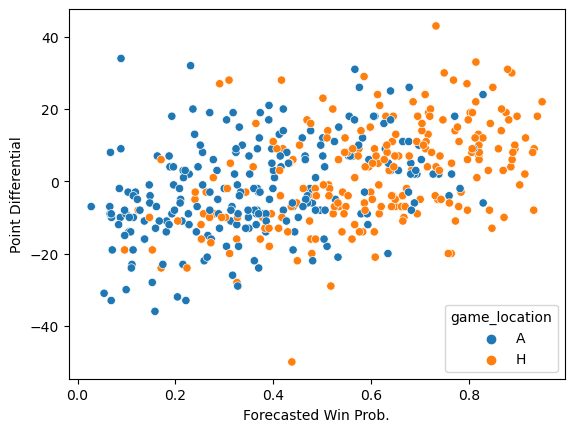

In [693]:
plt.clf()
sns.scatterplot(data=nba_2010,x='forecast',y='point_diff',hue='game_location')
plt.xlabel('Forecasted Win Prob.')
plt.ylabel('Point Differential')
plt.show()

*Despite the outliers we can suggest that there is a weak positive correlation between the forecasted and actual point difference observations.*